In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url='https://raw.githubusercontent.com/nachi-hebbar/ARIMA-Temperature_Forecasting/master/MaunaLoaDailyTemps.csv'
df=pd.read_csv(url,index_col='DATE',parse_dates=True)
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [ ]:
df.dropna(inplace=True)

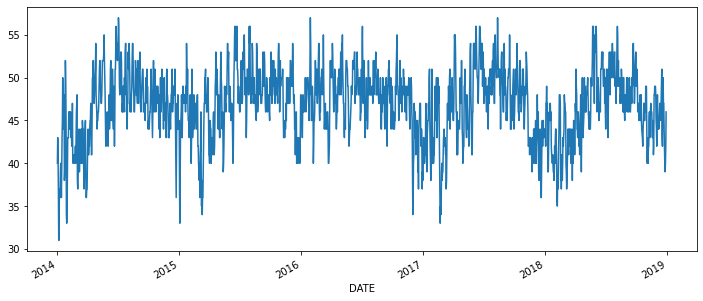

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))

Checking For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df['AvgTemp'],autolag='AIC')

(-6.554680125068777,
 8.675937480199653e-09,
 12,
 1808,
 {'1%': -3.433972018026501,
  '10%': -2.5676217442756872,
  '5%': -2.8631399192826676},
 8146.207832960945)

In [ ]:
def adfuller_test(data):
  data_test=adfuller(data,autolag='AIC')
  print("1. ADF : ",data_test[0])
  print("2. P-Value : ", data_test[1])
  print("3. Num Of Lags : ", data_test[2])
  print("4. Num Of Observations Used For ADF Regression:",data_test[3])
  print("5. Critical Values :")
  for key, val in data_test[4].items():
    print("\t",key, ": ", val)


In [ ]:
adfuller_test(df.AvgTemp)
# If p< 0.05 ; Data is stationary
# if p>0.05; Data is not stationary

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


**AR**
Y(t)= Some_Constant*Y(t-1)+ Another_Constant +Error(t)

**I**
Integrated

**MA**
Y(t)= Mean + Some_Constant*Error(t-1) +Error(t)


In [ ]:
# pmdarima library done automatically for which parameatr is best
!pip install pmdarima


In [ ]:
from pmdarima import auto_arima
auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=3.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=3.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=4.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=4.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=4.01 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=5.13 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=5.44 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=6.03 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=5.70 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 5), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

Split DataSet

In [ ]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1791, 5) (30, 5)


ARIMA model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1, 0, 5))
model=model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Mon, 29 Mar 2021   AIC                           8156.395
Time:                        19:12:03   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0595      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

Test Our model

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

In [ ]:
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred.index=index_future_dates

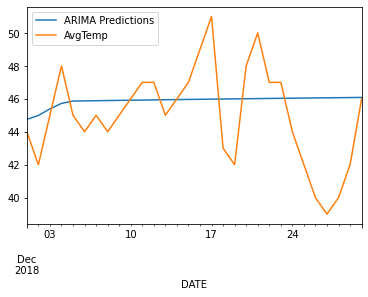

In [ ]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(test['AvgTemp'].mean())
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

45.0
3.000495429601031


In [ ]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [ ]:
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
pred.index=index_future_dates

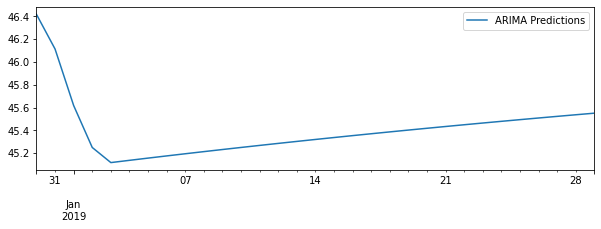

In [ ]:
pred.plot(figsize=(10,3),legend=True)